# Random Forest model for prediction of avalanche events

In [1]:
# import of standard Python libraries for data analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import needed objects from Scikit learn library for machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold

In [3]:
# I would like to see all rows and columns of dataframes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Reading dataset and final preprocessing

In [4]:
# reading dataset
df = pd.read_csv("final_data.csv")

In [5]:
df.head()

,elevation,massif_num,lon,lat,temp_soil_0.005_m,temp_soil_0.08_m,liquid_water_in_soil,frozen_water_in_soil,risk_index,aval_type,whiteness_albedo,net_radiation,drainage,runoff,snow_melting_rate,rainfall_rate,surface_temperature,surface_snow_amount,thickness_of_snowfall,snow_thickness_1D,snow_thickness_3D,snow_thickness_5D,snow_thickness_7D,snow_water_1D,snow_water_3D,snow_water_5D,snow_water_7D,penetration_ram_resistance,thickness_of_wet_snow_top_of_snowpack,thickness_of_frozen_snow_top_of_snowpack,acccidental_risk_index,day,surface_air_pressure_mean,near_surface_humidity_mean,relative_humidity_mean,freezing_level_altitude_mean,rain_snow_transition_altitude_mean,air_temp_max,wind_speed_max,snowfall_rate_max,nebulosity_max,air_temp_min,massif_name,aval_accident,aval_event
0,1500.0,1,6.64493,46.17685,277.709158,279.014864,0.323705,0.0,6.0,6.0,0.2,3.251180,0.000018,0.000019,0.0,0.000096,277.709158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2010-10-01,84550.445,0.005956,80.023400,2268.572667,422.333333,283.38647,4.92501,0.0,0.988523,277.14102,Chablais,0,0
1,1500.0,1,6.64493,46.17685,279.496314,280.143477,0.310928,0.0,6.0,6.0,0.2,79.345799,0.000018,0.000000,0.0,0.000000,279.496314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2010-10-02,84550.445,0.006067,58.228333,1080.672643,40.151042,288.89374,4.92201,0.0,0.758338,281.01437,Chablais,0,0
2,1500.0,1,6.64493,46.17685,278.575394,280.282568,0.305990,0.0,6.0,6.0,0.2,44.215499,0.000018,0.000000,0.0,0.000000,278.575394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2010-10-03,84550.445,0.006655,61.123905,1194.040409,11.500000,290.59950,3.32201,0.0,0.627164,282.84122,Chablais,0,0
3,1500.0,1,6.64493,46.17685,280.511023,281.446828,0.301774,0.0,6.0,6.0,0.2,73.435071,0.000018,0.000000,0.0,0.000000,280.511023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2010-10-04,84550.445,0.005970,58.574722,1937.796566,718.493056,291.77880,5.22301,0.0,0.996815,281.35240,Chablais,0,0
4,1500.0,1,6.64493,46.17685,280.790508,281.635283,0.319800,0.0,6.0,6.0,0.2,17.299822,0.000018,0.000008,0.0,0.000047,280.790508,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2010-10-05,84550.445,0.007777,94.231740,1837.712598,515.784722,284.17500,4.12301,0.0,0.982423,280.60666,Chablais,0,0


In [6]:
# viewing all variables to decide which are not useful
df.columns

Index(['elevation', 'massif_num', 'lon', 'lat', 'temp_soil_0.005_m',
       'temp_soil_0.08_m', 'liquid_water_in_soil', 'frozen_water_in_soil',
       'risk_index', 'aval_type', 'whiteness_albedo', 'net_radiation',
       'drainage', 'runoff', 'snow_melting_rate', 'rainfall_rate',
       'surface_temperature', 'surface_snow_amount', 'thickness_of_snowfall',
       'snow_thickness_1D', 'snow_thickness_3D', 'snow_thickness_5D',
       'snow_thickness_7D', 'snow_water_1D', 'snow_water_3D', 'snow_water_5D',
       'snow_water_7D', 'penetration_ram_resistance',
       'thickness_of_wet_snow_top_of_snowpack',
       'thickness_of_frozen_snow_top_of_snowpack', 'acccidental_risk_index',
       'day', 'surface_air_pressure_mean', 'near_surface_humidity_mean',
       'relative_humidity_mean', 'freezing_level_altitude_mean',
       'rain_snow_transition_altitude_mean', 'air_temp_max', 'wind_speed_max',
       'snowfall_rate_max', 'nebulosity_max', 'air_temp_min', 'massif_name',
       'aval_accid

In [7]:
# removing variables not needed for random forest model
df_clean = df.drop(columns=["massif_num","lon","lat","aval_type", "acccidental_risk_index", 
                            'snow_thickness_1D', 'snow_thickness_3D', 'snow_thickness_5D',
                           'snow_water_1D', 'snow_water_3D', 'snow_water_5D', 'risk_index',
                           'thickness_of_wet_snow_top_of_snowpack','thickness_of_frozen_snow_top_of_snowpack',
                           'surface_air_pressure_mean', 'rainfall_rate', 'drainage', 'runoff',
                           'liquid_water_in_soil', 'frozen_water_in_soil', 'elevation','snow_melting_rate'])

In [8]:
# viewing if data type of the variables is suitable for Random Forest
# there are 2 string categorical variables that needs to be transformed: day and massif name
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540818 entries, 0 to 540817
Data columns (total 23 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   temp_soil_0.005_m                   540818 non-null  float64
 1   temp_soil_0.08_m                    540818 non-null  float64
 2   whiteness_albedo                    540818 non-null  float64
 3   net_radiation                       540818 non-null  float64
 4   surface_temperature                 540818 non-null  float64
 5   surface_snow_amount                 540818 non-null  float64
 6   thickness_of_snowfall               540818 non-null  float64
 7   snow_thickness_7D                   540818 non-null  float64
 8   snow_water_7D                       540818 non-null  float64
 9   penetration_ram_resistance          540818 non-null  float64
 10  day                                 540818 non-null  object 
 11  near_surface_humidity_mean

In [9]:
df_clean.shape

(540818, 23)

In [10]:
# for transformation of massif names I will use OneHotEncoding with pd.get_dummies method
# selecting of values for dummies
df_clean.massif_name.unique()

array(['Chablais', 'Aravis', 'Mont-Blanc', 'Bauges', 'Beaufortin',
       'Hte-tarent', 'Chartreuse', 'Belledonne', 'Maurienne', 'Vanoise',
       'Hte-maurie', 'Gdes-rouss', 'Thabor', 'Vercors', 'Oisans',
       'Pelvoux', 'Queyras', 'Devoluy', 'Champsaur', 'Parpaillon',
       'Ubaye', 'Ht_Var-Ver', 'Mercantour'], dtype=object)

In [11]:
massifs = ('Chablais', 'Aravis', 'Mont-Blanc', 'Bauges', 'Beaufortin',
       'Hte-tarent', 'Chartreuse', 'Belledonne', 'Maurienne', 'Vanoise',
       'Hte-maurie', 'Gdes-rouss', 'Thabor', 'Vercors', 'Oisans',
       'Pelvoux', 'Queyras', 'Devoluy', 'Champsaur', 'Parpaillon',
       'Ubaye', 'Ht_Var-Ver', 'Mercantour')

In [12]:
# creating initial dataframe
df_massifs = pd.DataFrame(massifs, columns=['massif_name'])

# generate binary values using get_dummies
dum_df = pd.get_dummies(df_massifs, columns=["massif_name"], prefix="massif")

# merge initial dataframe with dummies
df_massifs = df_massifs.join(dum_df)

# merge final datatset with dataframe with dummies
df_clean = df_clean.merge(df_massifs, how="left", on="massif_name")

In [13]:
# checking dataset with dummy variables
df_clean.head()

,temp_soil_0.005_m,temp_soil_0.08_m,whiteness_albedo,net_radiation,surface_temperature,surface_snow_amount,thickness_of_snowfall,snow_thickness_7D,snow_water_7D,penetration_ram_resistance,day,near_surface_humidity_mean,relative_humidity_mean,freezing_level_altitude_mean,rain_snow_transition_altitude_mean,air_temp_max,wind_speed_max,snowfall_rate_max,nebulosity_max,air_temp_min,massif_name,aval_accident,aval_event,massif_Aravis,massif_Bauges,massif_Beaufortin,massif_Belledonne,massif_Chablais,massif_Champsaur,massif_Chartreuse,massif_Devoluy,massif_Gdes-rouss,massif_Ht_Var-Ver,massif_Hte-maurie,massif_Hte-tarent,massif_Maurienne,massif_Mercantour,massif_Mont-Blanc,massif_Oisans,massif_Parpaillon,massif_Pelvoux,massif_Queyras,massif_Thabor,massif_Ubaye,massif_Vanoise,massif_Vercors
0,277.709158,279.014864,0.2,3.251180,277.709158,0.0,0.0,0.0,0.0,0.0,2010-10-01,0.005956,80.023400,2268.572667,422.333333,283.38647,4.92501,0.0,0.988523,277.14102,Chablais,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,279.496314,280.143477,0.2,79.345799,279.496314,0.0,0.0,0.0,0.0,0.0,2010-10-02,0.006067,58.228333,1080.672643,40.151042,288.89374,4.92201,0.0,0.758338,281.01437,Chablais,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,278.575394,280.282568,0.2,44.215499,278.575394,0.0,0.0,0.0,0.0,0.0,2010-10-03,0.006655,61.123905,1194.040409,11.500000,290.59950,3.32201,0.0,0.627164,282.84122,Chablais,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,280.511023,281.446828,0.2,73.435071,280.511023,0.0,0.0,0.0,0.0,0.0,2010-10-04,0.005970,58.574722,1937.796566,718.493056,291.77880,5.22301,0.0,0.996815,281.35240,Chablais,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,280.790508,281.635283,0.2,17.299822,280.790508,0.0,0.0,0.0,0.0,0.0,2010-10-05,0.007777,94.231740,1837.712598,515.784722,284.17500,4.12301,0.0,0.982423,280.60666,Chablais,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
# getting rid of redundant variable
df_clean = df_clean.drop(columns=['massif_name'])

In [15]:
# second categorical variable to transform is day
# slicing is used to get years and months from day variable
# and after we need to transform years and months to integers
df_clean["year"] = (df_clean.day.str[:4]).astype(int)
df_clean["month"] = (df_clean.day.str[5:7]).astype(int)
df_clean.head()

,temp_soil_0.005_m,temp_soil_0.08_m,whiteness_albedo,net_radiation,surface_temperature,surface_snow_amount,thickness_of_snowfall,snow_thickness_7D,snow_water_7D,penetration_ram_resistance,day,near_surface_humidity_mean,relative_humidity_mean,freezing_level_altitude_mean,rain_snow_transition_altitude_mean,air_temp_max,wind_speed_max,snowfall_rate_max,nebulosity_max,air_temp_min,aval_accident,aval_event,massif_Aravis,massif_Bauges,massif_Beaufortin,massif_Belledonne,massif_Chablais,massif_Champsaur,massif_Chartreuse,massif_Devoluy,massif_Gdes-rouss,massif_Ht_Var-Ver,massif_Hte-maurie,massif_Hte-tarent,massif_Maurienne,massif_Mercantour,massif_Mont-Blanc,massif_Oisans,massif_Parpaillon,massif_Pelvoux,massif_Queyras,massif_Thabor,massif_Ubaye,massif_Vanoise,massif_Vercors,year,month
0,277.709158,279.014864,0.2,3.251180,277.709158,0.0,0.0,0.0,0.0,0.0,2010-10-01,0.005956,80.023400,2268.572667,422.333333,283.38647,4.92501,0.0,0.988523,277.14102,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2010,10
1,279.496314,280.143477,0.2,79.345799,279.496314,0.0,0.0,0.0,0.0,0.0,2010-10-02,0.006067,58.228333,1080.672643,40.151042,288.89374,4.92201,0.0,0.758338,281.01437,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2010,10
2,278.575394,280.282568,0.2,44.215499,278.575394,0.0,0.0,0.0,0.0,0.0,2010-10-03,0.006655,61.123905,1194.040409,11.500000,290.59950,3.32201,0.0,0.627164,282.84122,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2010,10
3,280.511023,281.446828,0.2,73.435071,280.511023,0.0,0.0,0.0,0.0,0.0,2010-10-04,0.005970,58.574722,1937.796566,718.493056,291.77880,5.22301,0.0,0.996815,281.35240,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2010,10
4,280.790508,281.635283,0.2,17.299822,280.790508,0.0,0.0,0.0,0.0,0.0,2010-10-05,0.007777,94.231740,1837.712598,515.784722,284.17500,4.12301,0.0,0.982423,280.60666,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2010,10


In [16]:
# getting rid of redundant variable
df_clean = df_clean.drop(columns=['day', 'year'])

In [17]:
# checking dataset with new time variables
df_clean.head()

,temp_soil_0.005_m,temp_soil_0.08_m,whiteness_albedo,net_radiation,surface_temperature,surface_snow_amount,thickness_of_snowfall,snow_thickness_7D,snow_water_7D,penetration_ram_resistance,near_surface_humidity_mean,relative_humidity_mean,freezing_level_altitude_mean,rain_snow_transition_altitude_mean,air_temp_max,wind_speed_max,snowfall_rate_max,nebulosity_max,air_temp_min,aval_accident,aval_event,massif_Aravis,massif_Bauges,massif_Beaufortin,massif_Belledonne,massif_Chablais,massif_Champsaur,massif_Chartreuse,massif_Devoluy,massif_Gdes-rouss,massif_Ht_Var-Ver,massif_Hte-maurie,massif_Hte-tarent,massif_Maurienne,massif_Mercantour,massif_Mont-Blanc,massif_Oisans,massif_Parpaillon,massif_Pelvoux,massif_Queyras,massif_Thabor,massif_Ubaye,massif_Vanoise,massif_Vercors,month
0,277.709158,279.014864,0.2,3.251180,277.709158,0.0,0.0,0.0,0.0,0.0,0.005956,80.023400,2268.572667,422.333333,283.38647,4.92501,0.0,0.988523,277.14102,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
1,279.496314,280.143477,0.2,79.345799,279.496314,0.0,0.0,0.0,0.0,0.0,0.006067,58.228333,1080.672643,40.151042,288.89374,4.92201,0.0,0.758338,281.01437,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
2,278.575394,280.282568,0.2,44.215499,278.575394,0.0,0.0,0.0,0.0,0.0,0.006655,61.123905,1194.040409,11.500000,290.59950,3.32201,0.0,0.627164,282.84122,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
3,280.511023,281.446828,0.2,73.435071,280.511023,0.0,0.0,0.0,0.0,0.0,0.005970,58.574722,1937.796566,718.493056,291.77880,5.22301,0.0,0.996815,281.35240,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
4,280.790508,281.635283,0.2,17.299822,280.790508,0.0,0.0,0.0,0.0,0.0,0.007777,94.231740,1837.712598,515.784722,284.17500,4.12301,0.0,0.982423,280.60666,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10


In [18]:
# verifying there are no null values in dataset
(df_clean.apply(lambda x: x.isnull().sum())).sum()

0

In [19]:
# checking one last time my dataset before creating RF models
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540818 entries, 0 to 540817
Data columns (total 45 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   temp_soil_0.005_m                   540818 non-null  float64
 1   temp_soil_0.08_m                    540818 non-null  float64
 2   whiteness_albedo                    540818 non-null  float64
 3   net_radiation                       540818 non-null  float64
 4   surface_temperature                 540818 non-null  float64
 5   surface_snow_amount                 540818 non-null  float64
 6   thickness_of_snowfall               540818 non-null  float64
 7   snow_thickness_7D                   540818 non-null  float64
 8   snow_water_7D                       540818 non-null  float64
 9   penetration_ram_resistance          540818 non-null  float64
 10  near_surface_humidity_mean          540818 non-null  float64
 11  relative_humidity_mean    

## Problem with very imbalanced dataset
- metrics like ROC AUC or Accuracy will be very high, but that does not provide any significant insight, because of imbalanced dataset with majority of No avalanche events
- in classification report metrics **Precision will have lesser importance for my analysis than Recall**, because I want to reduce number of False Negatives rather then number of False Positives
- **For performance of RF model, I will look mainly on weighted F1-score** metrics because it is the most suitable for this kind of analysis. F1-score is in fact weighted average of the precision and recall.

In [20]:
# Percentage of cases with and without avalanches showing imbalanced dataset
round((df_clean.aval_event.value_counts()/540818)*100, 2)

0    99.62
1     0.38
Name: aval_event, dtype: float64

### Vanilla Undersampling with RF class weight 'balanced_subsample'
- strategy to improve recall and F1 score, especially for cases where avalanche events happened
- class weight balanced subsample is used because in previous iterations of model this class weight had the best performance metrics

In [21]:
# class count for undersampling
count_class_0, count_class_1 = df_clean.aval_event.value_counts()

# dividing by class
df_class_0 = df_clean[df_clean['aval_event'] == 0]
df_class_1 = df_clean[df_clean['aval_event'] == 1]

Random under-sampling:
1    2039
0    2039
Name: aval_event, dtype: int64


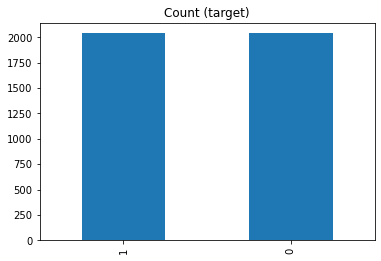

In [22]:
# creating new dataset for undersampling and plotting
df_class_0_under = df_class_0.sample(count_class_1)

df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.aval_event.value_counts())

df_test_under.aval_event.value_counts().plot(kind='bar', title='Count (target)');

In [23]:
# labels are the values we want to predict
labels_under = np.array(df_test_under['aval_event'])

# remove the labels from the features
features_under = df_test_under.drop(columns=['aval_event', 'aval_accident'])

# saving feature names for later use
feature_list_under = list(features_under.columns)

# convert to numpy array
features_under = np.array(features_under)

In [24]:
# splitting dataset into train and test
train_features_under, test_features_under, train_labels_under, test_labels_under = train_test_split(features_under, labels_under, test_size = 0.33, random_state = 42)

In [25]:
# displaying sizes of train/test features and labels
print('Training Features Shape:', train_features_under.shape)
print('Training Labels Shape:', train_labels_under.shape)
print('Testing Features Shape:', test_features_under.shape)
print('Testing Labels Shape:', test_labels_under.shape)

Training Features Shape: (2732, 43)
Training Labels Shape: (2732,)
Testing Features Shape: (1346, 43)
Testing Labels Shape: (1346,)


In [26]:
# generating dataset
features_under, labels_under = make_classification(n_samples=20000, n_features=2, n_redundant=0, 
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)
# defining model
rfc_under=RandomForestClassifier(n_estimators=100, class_weight='balanced_subsample')

# defining evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=3, random_state=1)

# evaluating model
scores = cross_val_score(rfc_under, features_under, labels_under, scoring='roc_auc', cv=cv, n_jobs=-1)

In [27]:
#fitting model and prediciton
rfc_under.fit(train_features_under,train_labels_under)

label_pred_under=rfc_under.predict(test_features_under)

In [28]:
# summary of performance
print('Mean ROC AUC: %.3f' % mean(scores))
print("Accuracy:",round(metrics.accuracy_score(test_labels_under, label_pred_under),5))
print("F1_score weighted:", round(f1_score(test_labels_under, label_pred_under, average='weighted'),5))

Mean ROC AUC: 0.976
Accuracy: 0.92125
F1_score weighted: 0.92126


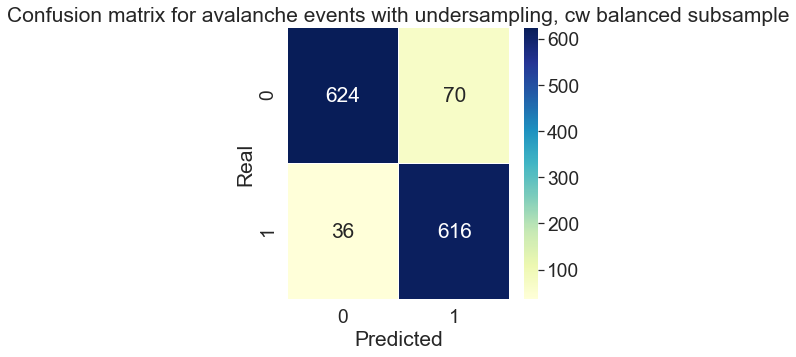

In [29]:
# displaying confusion matrix
sns.set(font_scale=1.75)
cf_matrix_under_1 = confusion_matrix(test_labels_under, label_pred_under)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cf_matrix_under_1, annot=True, ax=ax, cmap="YlGnBu", fmt=".0f", linewidths=.5)
plt.title("Confusion matrix for avalanche events with undersampling, cw balanced subsample")
plt.xlabel('Predicted')
plt.ylabel('Real');

In [30]:
# dispplaying report of performance of model
print(classification_report(test_labels_under, label_pred_under))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       694
           1       0.90      0.94      0.92       652

    accuracy                           0.92      1346
   macro avg       0.92      0.92      0.92      1346
weighted avg       0.92      0.92      0.92      1346



In [31]:
# creating dataframe to easily show importance of different variables on prediction
features_under_df = df_clean.drop(columns=['aval_event', 'aval_accident'])

pd.DataFrame({'Variable':features_under_df.columns,
              'Importance':rfc_under.feature_importances_}).sort_values('Importance', ascending=False)

,Variable,Importance
8,snow_water_7D,0.086720
7,snow_thickness_7D,0.076735
2,whiteness_albedo,0.067747
42,month,0.054502
12,freezing_level_altitude_mean,0.052543
18,air_temp_min,0.049065
4,surface_temperature,0.048096
3,net_radiation,0.047640
10,near_surface_humidity_mean,0.047167
13,rain_snow_transition_altitude_mean,0.043811


### Vanilla Undersampling with RF class weight "balanced"
- verification of performance for different class_weight in RF model
- here class weight balanced is chosen

In [32]:
# defining model, this time with different class weight
rfc_under_b=RandomForestClassifier(n_estimators=100, class_weight='balanced')

# evaluating model
scores = cross_val_score(rfc_under_b, features_under, labels_under, scoring='roc_auc', cv=cv, n_jobs=-1)

In [33]:
#fitting model and prediciton
rfc_under_b.fit(train_features_under,train_labels_under)

label_pred_under=rfc_under_b.predict(test_features_under)

In [34]:
# summary of performance
print('Mean ROC AUC: %.5f' % mean(scores))
print("Accuracy:",round(metrics.accuracy_score(test_labels_under, label_pred_under),5))
print("F1_score weighted:", round(f1_score(test_labels_under, label_pred_under, average='weighted'),5))

Mean ROC AUC: 0.97912
Accuracy: 0.91902
F1_score weighted: 0.91904


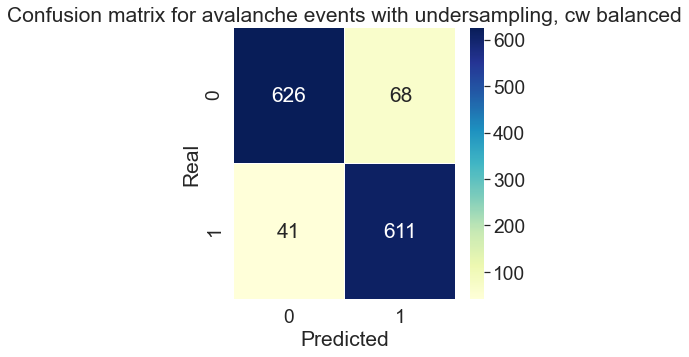

In [35]:
# displaying confusion matrix
cf_matrix_under_2 = confusion_matrix(test_labels_under, label_pred_under)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cf_matrix_under_2, annot=True, ax=ax, cmap="YlGnBu", fmt=".0f", linewidths=.5)
plt.title("Confusion matrix for avalanche events with undersampling, cw balanced")
plt.xlabel('Predicted')
plt.ylabel('Real');

In [36]:
# displaying report of performance of model
print(classification_report(test_labels_under, label_pred_under))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       694
           1       0.90      0.94      0.92       652

    accuracy                           0.92      1346
   macro avg       0.92      0.92      0.92      1346
weighted avg       0.92      0.92      0.92      1346



In [37]:
# creating dataframe to easily show importance of different variables on prediction
features_under_df_b = df_clean.drop(columns=['aval_event', 'aval_accident'])

pd.DataFrame({'Variable':features_under_df_b.columns,
              'Importance':rfc_under_b.feature_importances_}).sort_values('Importance', ascending=False)

,Variable,Importance
8,snow_water_7D,0.094663
7,snow_thickness_7D,0.080751
2,whiteness_albedo,0.066649
42,month,0.058097
12,freezing_level_altitude_mean,0.053752
18,air_temp_min,0.052123
3,net_radiation,0.047844
13,rain_snow_transition_altitude_mean,0.044769
10,near_surface_humidity_mean,0.044358
5,surface_snow_amount,0.039083


## Results without undersampling
- in reality there won't be 50 % of cases with and 50 % without avalanche
- therefore predictive capacity of the my **Random Forest model will be more close to results without undersampling strategy**, even though in reality there are more avalanches than they are being detected so there is more than 0,4 % of avalanches which I have in my dataset

### RF model without resampling with class weight balanced subsample

In [38]:
# labels are the values we want to predict
labels_ev = np.array(df_clean['aval_event'])

# removing the labels from the features
features_ev = df_clean.drop(columns=['aval_event', 'aval_accident'])

# saving feature names for later use
feature_list_ev = list(features_ev.columns)

# converting to numpy array
features_ev = np.array(features_ev)

In [39]:
# splitting dataset into train and test
train_features_ev, test_features_ev, train_labels_ev, test_labels_ev = train_test_split(features_ev, labels_ev, test_size = 0.33, random_state = 42)

In [40]:
# displaying sizes of train/test features and labels
print('Training Features Shape:', train_features_ev.shape)
print('Training Labels Shape:', train_labels_ev.shape)
print('Testing Features Shape:', test_features_ev.shape)
print('Testing Labels Shape:', test_labels_ev.shape)

Training Features Shape: (362348, 43)
Training Labels Shape: (362348,)
Testing Features Shape: (178470, 43)
Testing Labels Shape: (178470,)


In [41]:
# generating dataset
features_ev, labels_ev = make_classification(n_samples=20000, n_features=2, n_redundant=0, 
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

# I have chosen model rfc_under that has provided with better performance results ()

# evaluating model
scores = cross_val_score(rfc_under, features_ev, labels_ev, scoring='roc_auc', cv=cv, n_jobs=-1)

In [42]:
%%time

# fitting model and prediction
rfc_under.fit(train_features_ev,train_labels_ev)

label_pred_ev = rfc_under.predict(test_features_ev)

Wall time: 2min 42s


In [43]:
# summary of performance
print('Mean ROC AUC: %.5f' % mean(scores))
print("Accuracy:",round(metrics.accuracy_score(test_labels_ev, label_pred_ev),5))
print("F1_score weighted:", round(f1_score(test_labels_ev, label_pred_ev, average='weighted'),5))

Mean ROC AUC: 0.98326
Accuracy: 0.99821
F1_score weighted: 0.99795


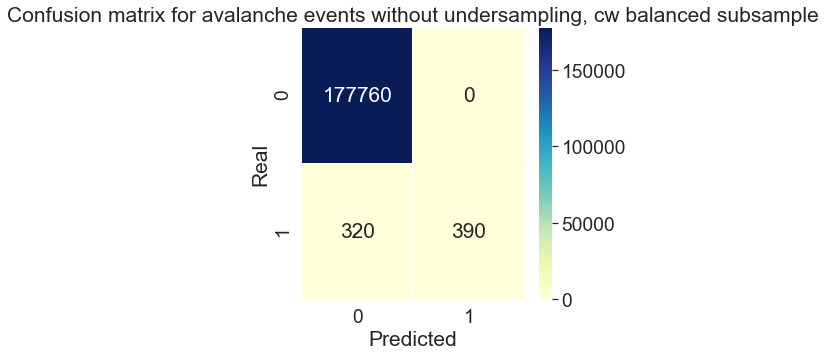

In [44]:
# displaying confusion matrix
f, ax = plt.subplots(figsize=(5, 5))
cf_matrix_2 = confusion_matrix(test_labels_ev, label_pred_ev)
sns.heatmap(cf_matrix_2, annot=True, ax=ax, cmap="YlGnBu", fmt=".0f", linewidths=.5)
plt.title("Confusion matrix for avalanche events without undersampling, cw balanced subsample")
plt.xlabel('Predicted')
plt.ylabel('Real');

In [45]:
# displaying report of performance of model
print(classification_report(test_labels_ev, label_pred_ev))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    177760
           1       1.00      0.55      0.71       710

    accuracy                           1.00    178470
   macro avg       1.00      0.77      0.85    178470
weighted avg       1.00      1.00      1.00    178470



In [46]:
# creating dataframe to easily show importance of different variables on prediction
features_ev_df = df_clean.drop(columns=['aval_event', 'aval_accident'])
pd.DataFrame({'Variable':features_ev_df.columns,
              'Importance':rfc_under.feature_importances_}).sort_values('Importance', ascending=False)

,Variable,Importance
8,snow_water_7D,0.098606
2,whiteness_albedo,0.086305
7,snow_thickness_7D,0.070304
42,month,0.059353
12,freezing_level_altitude_mean,0.053926
3,net_radiation,0.049793
13,rain_snow_transition_altitude_mean,0.047940
6,thickness_of_snowfall,0.042941
18,air_temp_min,0.042238
11,relative_humidity_mean,0.037709


### RF model without resampling with class weight balanced

In [47]:
%%time
# evaluate model
scores = cross_val_score(rfc_under_b, features_ev, labels_ev, scoring='roc_auc', cv=cv, n_jobs=-1)

# fit the model with class weight "balanced"
rfc_under_b.fit(train_features_ev,train_labels_ev)
label_pred_ev = rfc_under_b.predict(test_features_ev)

Wall time: 2min 34s


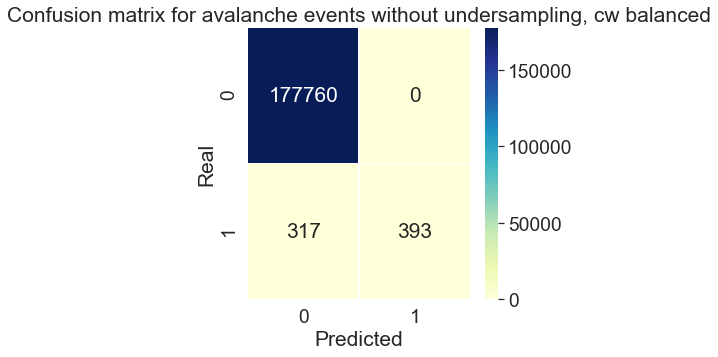

In [48]:
# displaying confusion matrix
cf_matrix = confusion_matrix(test_labels_ev, label_pred_ev)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cf_matrix, annot=True, ax=ax, cmap="YlGnBu", fmt=".0f", linewidths=.5)
plt.title("Confusion matrix for avalanche events without undersampling, cw balanced")
plt.xlabel('Predicted')
plt.ylabel('Real');

In [49]:
# displaying report of performance of model
print(classification_report(test_labels_ev, label_pred_ev))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    177760
           1       1.00      0.55      0.71       710

    accuracy                           1.00    178470
   macro avg       1.00      0.78      0.86    178470
weighted avg       1.00      1.00      1.00    178470



In [50]:
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))
print("Accuracy:",round(metrics.accuracy_score(test_labels_ev, label_pred_ev),5))
print("F1_score weighted:", round(f1_score(test_labels_ev, label_pred_ev, average='weighted'),5))

Mean ROC AUC: 0.977
Accuracy: 0.99822
F1_score weighted: 0.99797


## Results with only 10 most important variables
- To better understand importance of different snow and meteo variables on predictive capacity I decided to reduce number of variables used for RF model

In [51]:
# displaying 10 most important variables
variables = pd.DataFrame({'Variable':features_ev_df.columns,
              'Importance':rfc_under.feature_importances_}).sort_values('Importance', ascending=False)

variables.head(10)

,Variable,Importance
8,snow_water_7D,0.098606
2,whiteness_albedo,0.086305
7,snow_thickness_7D,0.070304
42,month,0.059353
12,freezing_level_altitude_mean,0.053926
3,net_radiation,0.049793
13,rain_snow_transition_altitude_mean,0.047940
6,thickness_of_snowfall,0.042941
18,air_temp_min,0.042238
11,relative_humidity_mean,0.037709


In [52]:
# saving 10 most important variables as variable
vars_10 = variables.Variable[0:10]

In [53]:
# checking type of variable vars_10
type(vars_10)

pandas.core.series.Series

In [54]:
# changing variable to dataframe and verification of the change
vars_10 = vars_10.to_frame()
type(vars_10)

pandas.core.frame.DataFrame

In [55]:
# display of array of 10 variables for easier copypaste
vars_10.Variable.unique()

array(['snow_water_7D', 'whiteness_albedo', 'snow_thickness_7D', 'month',
       'freezing_level_altitude_mean', 'net_radiation',
       'rain_snow_transition_altitude_mean', 'thickness_of_snowfall',
       'air_temp_min', 'relative_humidity_mean'], dtype=object)

In [56]:
# creating new dataframe only with 10 most imporatnt variables
df_vars = df_clean[['snow_thickness_7D', 'snow_water_7D', 'month',
       'freezing_level_altitude_mean', 'net_radiation',
       'whiteness_albedo', 'rain_snow_transition_altitude_mean',
       'air_temp_min', 'near_surface_humidity_mean',
       'penetration_ram_resistance', 'aval_event']]

In [57]:
# checking the result
df_vars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540818 entries, 0 to 540817
Data columns (total 11 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   snow_thickness_7D                   540818 non-null  float64
 1   snow_water_7D                       540818 non-null  float64
 2   month                               540818 non-null  int32  
 3   freezing_level_altitude_mean        540818 non-null  float64
 4   net_radiation                       540818 non-null  float64
 5   whiteness_albedo                    540818 non-null  float64
 6   rain_snow_transition_altitude_mean  540818 non-null  float64
 7   air_temp_min                        540818 non-null  float64
 8   near_surface_humidity_mean          540818 non-null  float64
 9   penetration_ram_resistance          540818 non-null  float64
 10  aval_event                          540818 non-null  int64  
dtypes: float64(9), int32(1), i

In [58]:
# displaying of new dataframe
df_vars.shape

(540818, 11)

In [59]:
# labels are the values we want to predict
labels_var = np.array(df_vars['aval_event'])

# removing the labels from the features
features_var = df_vars.drop(columns=['aval_event'])

# saving feature names for later use
feature_list_var = list(features_var.columns)

# converting to numpy array
features_var = np.array(features_var)

In [60]:
# splitting dataset into train and test
train_features_var, test_features_var, train_labels_var, test_labels_var = train_test_split(features_var, labels_var, test_size = 0.33, random_state = 42)

In [61]:
# displaying sizes of train/test features and labels
print('Training Features Shape:', train_features_var.shape)
print('Training Labels Shape:', train_labels_var.shape)
print('Testing Features Shape:', test_features_var.shape)
print('Testing Labels Shape:', test_labels_var.shape)

Training Features Shape: (362348, 10)
Training Labels Shape: (362348,)
Testing Features Shape: (178470, 10)
Testing Labels Shape: (178470,)


In [62]:
%%time

# generate dataset
features_var, labels_var = make_classification(n_samples=20000, n_features=2, n_redundant=0, 
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)
# define model
rfc_var=RandomForestClassifier(n_estimators=100, class_weight='balanced')

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=3, random_state=1)

# evaluate model
scores = cross_val_score(rfc_var, features_var, labels_var, scoring='roc_auc', cv=cv, n_jobs=-1)

Wall time: 10.3 s


In [63]:
%%time
# fitting the model and prediction
rfc_var.fit(train_features_var, train_labels_var)

label_pred_var = rfc_var.predict(test_features_var)

Wall time: 1min 41s


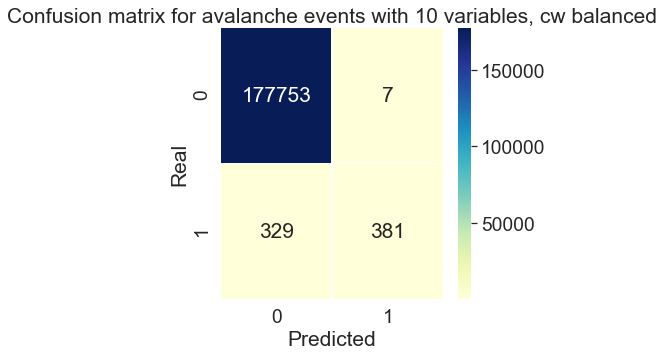

In [64]:
# displaying confusion matrix
cf_matrix_var = confusion_matrix(test_labels_var, label_pred_var)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cf_matrix_var, annot=True, ax=ax, cmap="YlGnBu", fmt=".0f", linewidths=.5)
plt.title("Confusion matrix for avalanche events with 10 variables, cw balanced")
plt.xlabel('Predicted')
plt.ylabel('Real');

In [65]:
# displaying report of performance of model
print(classification_report(test_labels_var, label_pred_var))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    177760
           1       0.98      0.54      0.69       710

    accuracy                           1.00    178470
   macro avg       0.99      0.77      0.85    178470
weighted avg       1.00      1.00      1.00    178470



In [66]:
# summarize performance of the model
print('Mean ROC AUC: %.3f' % mean(scores))
print("Accuracy:",round(metrics.accuracy_score(test_labels_var, label_pred_var),5))
print("F1_score weighted:", round(f1_score(test_labels_var, label_pred_var, average='weighted'),5))

Mean ROC AUC: 0.982
Accuracy: 0.99812
F1_score weighted: 0.99784


In [67]:
# creating dataframe to easily show importance of 10 most important variables on prediction
features_var_df = df_vars.drop(columns=['aval_event'])
pd.DataFrame({'Variable':features_var_df.columns,
              'Importance':rfc_var.feature_importances_}).sort_values('Importance', ascending=False)

,Variable,Importance
1,snow_water_7D,0.150494
5,whiteness_albedo,0.124512
0,snow_thickness_7D,0.121348
3,freezing_level_altitude_mean,0.116953
6,rain_snow_transition_altitude_mean,0.104956
2,month,0.099664
7,air_temp_min,0.086008
4,net_radiation,0.082703
8,near_surface_humidity_mean,0.071411
9,penetration_ram_resistance,0.041951


## Results without summer months

In [68]:
summer_season = [6, 7, 8]
df_winter = df_clean[~df_clean["month"].isin(summer_season)]

In [69]:
df_winter.head()

,temp_soil_0.005_m,temp_soil_0.08_m,whiteness_albedo,net_radiation,surface_temperature,surface_snow_amount,thickness_of_snowfall,snow_thickness_7D,snow_water_7D,penetration_ram_resistance,near_surface_humidity_mean,relative_humidity_mean,freezing_level_altitude_mean,rain_snow_transition_altitude_mean,air_temp_max,wind_speed_max,snowfall_rate_max,nebulosity_max,air_temp_min,aval_accident,aval_event,massif_Aravis,massif_Bauges,massif_Beaufortin,massif_Belledonne,massif_Chablais,massif_Champsaur,massif_Chartreuse,massif_Devoluy,massif_Gdes-rouss,massif_Ht_Var-Ver,massif_Hte-maurie,massif_Hte-tarent,massif_Maurienne,massif_Mercantour,massif_Mont-Blanc,massif_Oisans,massif_Parpaillon,massif_Pelvoux,massif_Queyras,massif_Thabor,massif_Ubaye,massif_Vanoise,massif_Vercors,month
0,277.709158,279.014864,0.2,3.251180,277.709158,0.0,0.0,0.0,0.0,0.0,0.005956,80.023400,2268.572667,422.333333,283.38647,4.92501,0.0,0.988523,277.14102,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
1,279.496314,280.143477,0.2,79.345799,279.496314,0.0,0.0,0.0,0.0,0.0,0.006067,58.228333,1080.672643,40.151042,288.89374,4.92201,0.0,0.758338,281.01437,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
2,278.575394,280.282568,0.2,44.215499,278.575394,0.0,0.0,0.0,0.0,0.0,0.006655,61.123905,1194.040409,11.500000,290.59950,3.32201,0.0,0.627164,282.84122,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
3,280.511023,281.446828,0.2,73.435071,280.511023,0.0,0.0,0.0,0.0,0.0,0.005970,58.574722,1937.796566,718.493056,291.77880,5.22301,0.0,0.996815,281.35240,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10
4,280.790508,281.635283,0.2,17.299822,280.790508,0.0,0.0,0.0,0.0,0.0,0.007777,94.231740,1837.712598,515.784722,284.17500,4.12301,0.0,0.982423,280.60666,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10


In [70]:
# labels are the values we want to predict
labels_win = np.array(df_winter['aval_event'])

# removing the labels from the features
features_win = df_winter.drop(columns=['aval_event', 'aval_accident'])

# saving feature names for later use
feature_list_win = list(features_win.columns)

# converting to numpy array
features_win = np.array(features_win)

In [71]:
# splitting dataset into train and test
train_features_win, test_features_win, train_labels_win, test_labels_win = train_test_split(features_win, labels_win, test_size = 0.33, random_state = 42)

In [72]:
# displaying sizes of train/test features and labels
print('Training Features Shape:', train_features_win.shape)
print('Training Labels Shape:', train_labels_win.shape)
print('Testing Features Shape:', test_features_win.shape)
print('Testing Labels Shape:', test_labels_win.shape)

Training Features Shape: (272164, 43)
Training Labels Shape: (272164,)
Testing Features Shape: (134052, 43)
Testing Labels Shape: (134052,)


In [73]:
%%time

# evaluate model
scores = cross_val_score(rfc_under, features_win, labels_win, scoring='roc_auc', cv=cv, n_jobs=-1)

Wall time: 28min 14s


In [74]:
%%time
# fitting the model and prediction
rfc_under.fit(train_features_win, train_labels_win)

label_pred_win = rfc_under.predict(test_features_win)

Wall time: 4min 25s


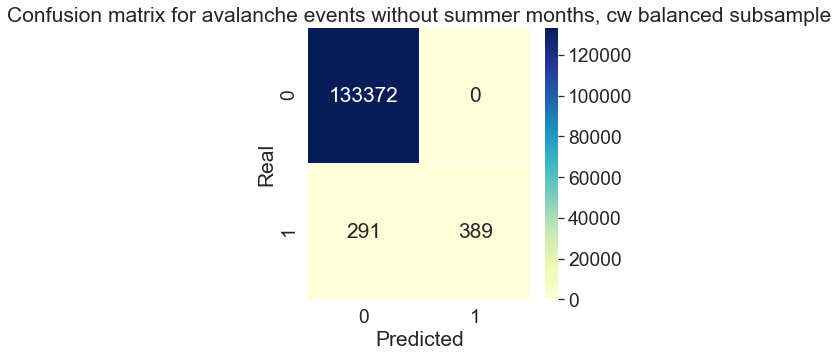

In [75]:
cf_matrix_win = confusion_matrix(test_labels_win, label_pred_win)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cf_matrix_win, annot=True, ax=ax, cmap="YlGnBu", fmt=".0f", linewidths=.5)
plt.title("Confusion matrix for avalanche events without summer months, cw balanced subsample")
plt.xlabel('Predicted')
plt.ylabel('Real');

In [76]:
# displaying report of performance of model
print(classification_report(test_labels_win, label_pred_win))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    133372
           1       1.00      0.57      0.73       680

    accuracy                           1.00    134052
   macro avg       1.00      0.79      0.86    134052
weighted avg       1.00      1.00      1.00    134052



In [77]:
# summarize performance of the model
print('Mean ROC AUC: %.3f' % mean(scores))
print("Accuracy:",round(metrics.accuracy_score(test_labels_win, label_pred_win),5))
print("F1_score weighted:", round(f1_score(test_labels_win, label_pred_win, average='weighted'),5))

Mean ROC AUC: 0.996
Accuracy: 0.99783
F1_score weighted: 0.99753


In [78]:
# creating dataframe to easily show importance of 10 most important variables on prediction
features_win_df = df_clean.drop(columns=['aval_accident', 'aval_event'])

In [79]:
pd.DataFrame({'Variable':features_win_df.columns,
              'Importance':rfc_under.feature_importances_}).sort_values('Importance', ascending=False)

,Variable,Importance
2,whiteness_albedo,0.074369
7,snow_thickness_7D,0.074174
8,snow_water_7D,0.069094
42,month,0.064110
12,freezing_level_altitude_mean,0.061638
13,rain_snow_transition_altitude_mean,0.051872
9,penetration_ram_resistance,0.045366
11,relative_humidity_mean,0.042793
17,nebulosity_max,0.040439
18,air_temp_min,0.037869


In [80]:
%%time

# evaluate model
scores = cross_val_score(rfc_under_b, features_win, labels_win, scoring='roc_auc', cv=cv, n_jobs=-1)

Wall time: 27min 9s


In [81]:
%%time
# fitting the model and prediction
rfc_under_b.fit(train_features_win, train_labels_win)

label_pred_win = rfc_under_b.predict(test_features_win)

Wall time: 3min 51s


In [86]:
# displaying report of performance of model
print(classification_report(test_labels_win, label_pred_win))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    133372
           1       1.00      0.57      0.73       680

    accuracy                           1.00    134052
   macro avg       1.00      0.79      0.86    134052
weighted avg       1.00      1.00      1.00    134052



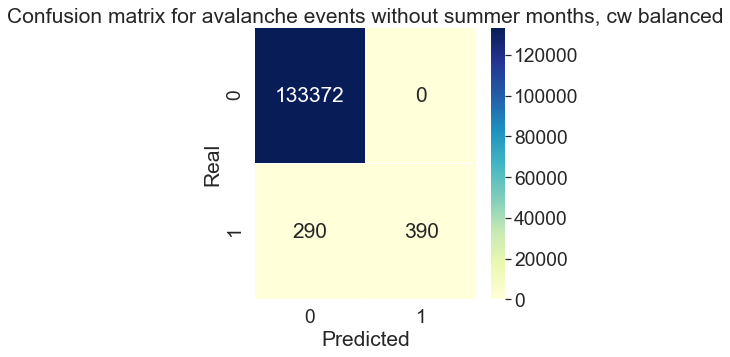

In [82]:
cf_matrix_win = confusion_matrix(test_labels_win, label_pred_win)
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cf_matrix_win, annot=True, ax=ax, cmap="YlGnBu", fmt=".0f", linewidths=.5)
plt.title("Confusion matrix for avalanche events without summer months, cw balanced")
plt.xlabel('Predicted')
plt.ylabel('Real');

In [83]:
# summarize performance of the model
print('Mean ROC AUC: %.3f' % mean(scores))
print("Accuracy:",round(metrics.accuracy_score(test_labels_win, label_pred_win),5))
print("F1_score weighted:", round(f1_score(test_labels_win, label_pred_win, average='weighted'),5))

Mean ROC AUC: 0.995
Accuracy: 0.99784
F1_score weighted: 0.99754


In [84]:
# creating dataframe to easily show importance of 10 most important variables on prediction
features_win_df = df_clean.drop(columns=['aval_accident', 'aval_event'])

In [85]:
pd.DataFrame({'Variable':features_win_df.columns,
              'Importance':rfc_under_b.feature_importances_}).sort_values('Importance', ascending=False)

,Variable,Importance
7,snow_thickness_7D,0.081711
8,snow_water_7D,0.078830
2,whiteness_albedo,0.062070
12,freezing_level_altitude_mean,0.061521
42,month,0.060054
13,rain_snow_transition_altitude_mean,0.053907
9,penetration_ram_resistance,0.043935
11,relative_humidity_mean,0.043664
3,net_radiation,0.041506
17,nebulosity_max,0.040287


## Summary of Random Forest results
- Undersampling:

I used **undersampling where 50 % of cases included days with avalanche and 50 % of cases where without avalanche**. I used Random Forest model with undersampling for two options: with class weights 1) "balanced subsample" and 2) "balanced". **Model did return slightly better results for class weight balanced subsample. Weighted F1-score was 0.92126** for class weight balanced subsample, while for class weight balanced it is was 0.91904. **Recall for day without avalanche was 0,9 for both models, while recall for days with avalanche was 0.94 for both models as well.

- Normal Sample:

After I used trained RF models on normal sample with highly imbalanced data in favour of days without avalanches. Again I did two iterations for different class weights. Both iterations had very similar results. **Recall for day without avalanche was 1**. This means it was perfect, but this result is not suprising nor that ipressive because of imbalanced nature of my dataset. On the other hand, **recall for days with avalanche was 0.55 for both iterations. This means I could correctly predict only every second avalanche**, which is not that ideal result. Weighted F1-score was in both iterations better than previously with undersampling. **Normal sample had weighted F1-score 0.998, which 0.095 better than best result with undersampling**.

- Reduction of variables:

When I **reduced number of independent variables to 10 most important variables**, I could observe descrease of performance of RF model in weigthed F1-score and also in recall for days with avalanche. **The recall was 0.54, while we got previously 0.55 recall for days with avalanche without reduction of variables. Therefore it is not recommended to reduce number of variable to reduce time execution of Random Forest model, because we put more importance on keeping higher recall for days with avalanche**.

- Sample without summer months:

When I removed all data for summer months, I could observe slight descrease of performance of RF model in weigthed F1-score, but on the other hand recall for days without avalanche stayed 1 and more importantly **recall for days with avalanches has improved for 0,57 (instead of 0,55 recall obtained on normal samples). Therefore this model would be little bit better for use in reality, even though it is still not good enough, because recall for days with avalanche should be ideally higher**.